# Introduction and Objectives

Let's see if we can predict the final price of a customer's basket, based on other indicators in the data. If our model is accurate, we can check which of the indicators is most useful for making predictions.

These indicators could be:

* country of origin
* month of year
* number of days from Christmas
* presence of a number of key items in the basket

We want to simulate a customer having put something in their basket, with the express intent to buy it (obviously not all baskets lead to a checkout, but this isn't something we can see from here). As such, we won't be using features which we knew retrospectively, such as the total invoice price for the basket, or even the number of units of each item in the basket.

This way, we could, for example, see that a customer from a certain country has added a certain item to their basket which tends to result in high value baskets. We can then market to this customer to try and increase their total purchase up to this amount.

There might not be a whole lot of insight garnered from this, but I just wanted to play with this data set and see what kind of predictions could be made given this type of data, and get familiar with this type of datast.

# Importing Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

First, we import the data

In [2]:
cd

C:\Users\leahy


In [3]:
data = pd.read_csv('google drive/freelance/own projects/online_retail/online_retail_data.csv', encoding='utf-8')

# Inspecting and Cleaning the Data

Here we check the types of the data, column names, missing vals, etc.

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [5]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
data.columns = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
data.invoice_date = pd.to_datetime(data.invoice_date, dayfirst=True)
data.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


---

`missingno` is a great package which allows various ways of visually inspecting data for missing values

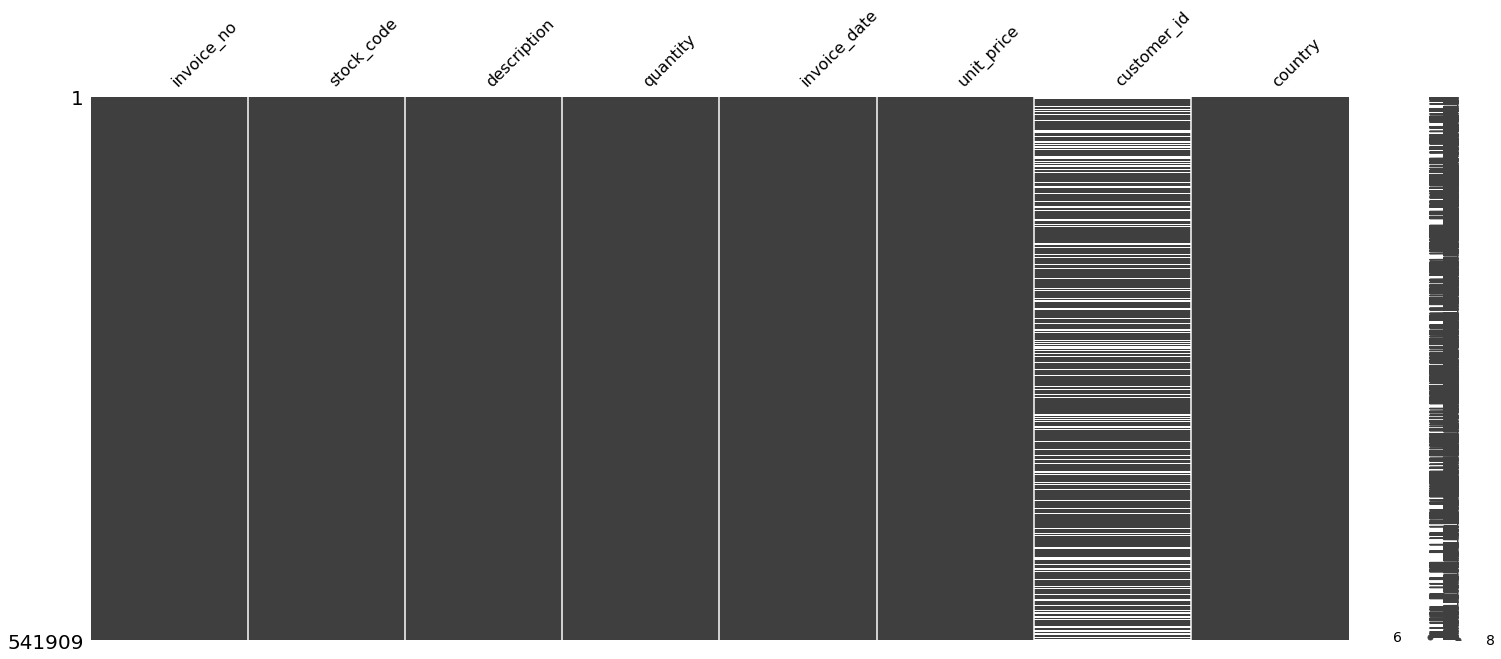

In [7]:
msno.matrix(data)

As can be seen, customer_id is missing various fields. Let's inspect which ones are missing.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   country       541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


---

Both `customer_id` and `description` are missing values.

Let's have a look at the `customer_id` columns that are missing and see if there's an overlap between the two:

In [9]:
data[data.description.isna()].shape

(1454, 8)

In [10]:
data[data.customer_id.isna() & data.description.isna()].shape

(1454, 8)

Yes!

Now let's have a quick look to see what the differences are across the two.

In [11]:
data[data.customer_id.isna()]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


Let's drop these values.

In addition, let's drop duplicates

In [12]:
data = data.dropna()

data = data.drop_duplicates()

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    401604 non-null  object        
 1   stock_code    401604 non-null  object        
 2   description   401604 non-null  object        
 3   quantity      401604 non-null  int64         
 4   invoice_date  401604 non-null  datetime64[ns]
 5   unit_price    401604 non-null  float64       
 6   customer_id   401604 non-null  float64       
 7   country       401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


---
Next, let's make sure that the `invoice_no`s are all numbers, and that the `quanitity`s and `unit_price`s are all positive.

First, we use regex to make sure that all `invoice_no`s are strings of numbers:

In [13]:
invoices = data.invoice_no
invoices[~invoices.str.contains('^[0-9]+$')]

141       C536379
154       C536383
235       C536391
236       C536391
237       C536391
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: invoice_no, Length: 8872, dtype: object

In [14]:
invoices[invoices.str.contains('C')]

141       C536379
154       C536383
235       C536391
236       C536391
237       C536391
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: invoice_no, Length: 8872, dtype: object

So, all invoices that have a letter in them start with the letter "C"

In [15]:
data[(data.unit_price < 0)]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country


In [16]:
data[(data.quantity < 0)]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [17]:
data[data.quantity < 0].equals(data[data.invoice_no.str.contains('C')])

True

Looks like there are no `unit_price`s below zero, but that every `invoice_no` with a negative value matches a negative `invoice_no`.

It's possible that these are in fact returns or cancelled orders. Let's see if they match up with orders without a leading "C".

In [18]:
canceled_orders = data[data.quantity < 0].invoice_no.str[1:]
canceled_orders

141       536379
154       536383
235       536391
236       536391
237       536391
           ...  
540449    581490
541541    581499
541715    581568
541716    581569
541717    581569
Name: invoice_no, Length: 8872, dtype: object

In [19]:
data[data.invoice_no.isin(canceled_orders)]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country


Ok, so they don't match.

In this case, let's remove the `canceled_orders` from `data`.

In [20]:
data = data.drop(canceled_orders.index)

# Preparation

## Group by invoice
First, let's group the data into baskets by `invoice_no`. We also verify that there is indeed only one `customer_id` per `invoice_no`.

In [21]:
data['total_price'] = data.quantity * data.unit_price
baskets = data.groupby('invoice_no')
baskets.customer_id.nunique().nunique()

1

Next, let's add an `basket_total` to the data:

In [22]:
data['basket_total'] = baskets.total_price.transform('sum')

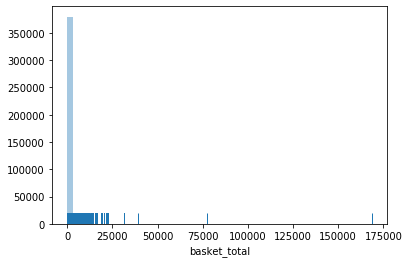

In [23]:
sns.distplot(a=data.basket_total, kde=False, rug=True)

## Target Creation - Basket Price Levels
We're going to split the baskets into different distinct groups based on the amount in each one.

Looks like most baskets are well below a 25000 total. Let's see what they are like below this:

In [24]:
data.customer_id.nunique()

4339

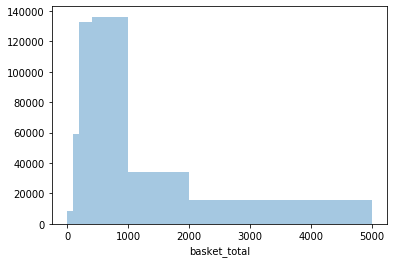

In [25]:
sns.distplot(a=data.basket_total, kde=False, bins=[0, 100, 200, 400, 1000, 2000, 5000])

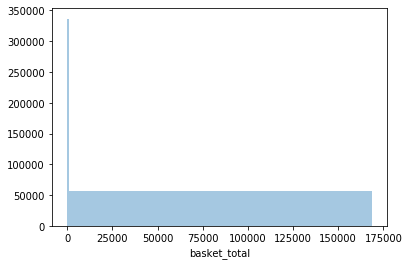

In [26]:
sns.distplot(a=data.basket_total, kde=False, bins=[0, 1000, data.basket_total.max()])

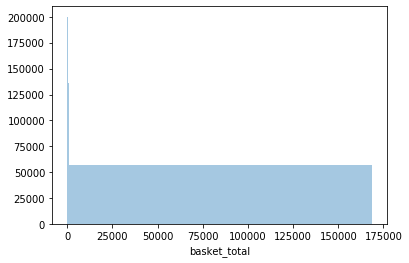

In [27]:
sns.distplot(a=data.basket_total, kde=False, bins=[0, 400, 1000, data.basket_total.max()])

Form here, let's try and class the baskets into 3 different sizes: \[0, 1000\), \[1000, 2000\], >2000

In [28]:
data.loc[(data.basket_total < 400), 'basket_size'] = 0
data.loc[(data.basket_total >= 400) & (data.basket_total < 1000), 'basket_size'] = 1
data.loc[(data.basket_total >= 1000), 'basket_size'] = 2

## Split into Train and Test Data
We need to hold out a test set until the end to evaluate our final model on.

There are a couple of options when selecting this test set - we can select some data from towards the end of the time period, or make a bunch of random selections.

If we had multiple year's worth of data, I'd be inclined to take a full year's worth to test, as there are probably some time-based effects in play here. However, we only have about 12 months' to play with, and I don't think taking two months at the end that are probably very typical to Christmas-time is the best way to test. Hence, I'll take a random sample.

In any case, the sampling will be done by `invoice_no`, i.e. data from the same invoice won't be split up into the test or train group. This is because we don't want our model learning what that particular invoice looks like, rather than what we're trying to model - the final basket price based on a single "independent" sample, or as close to this as possible.

<a id='month_expl'></a>

**note: the code below is created for the reasons described in the [feature selection](#feature_expl) section**

In [29]:
# see section 
data['sin_month'] = np.sin((2 * np.pi * data.invoice_date.dt.month) / 12)
data['cos_month'] = np.cos((2 * np.pi * data.invoice_date.dt.month) / 12)

Now, we split into train and test sets:

In [30]:
invoice_nos = data.invoice_no.unique()
idx = np.random.choice(len(invoice_nos), int(0.2 * len(invoice_nos)),
                       replace=False)
test_invoices = invoice_nos[idx]

X_train = data[~data.invoice_no.isin(test_invoices)].drop(columns='basket_size')
X_test = data[data.invoice_no.isin(test_invoices)].drop(columns='basket_size')
y_train = data[~data.invoice_no.isin(test_invoices)].basket_size
y_test = data[data.invoice_no.isin(test_invoices)].basket_size

# Create Pipeline and Search for Best Performing Model

<!-- Here we will be exclusively be using `data_train` to build and evaluate our final model. It will be given a final evaluation under `data_test` at the end. -->

Here we will build the features, decide on a cross-validation scheme, and finally build a pipeline to decide on the best combination of features, modelling technique and other techniques to build the best final model.

## Features
In this section we'll write the code to build new features. These will be created in transformer classes, so that they can be integrated into the cross-validation and gridsearch pipeline. This is to ensure feature sets are created only from data in the training fold of each CV iteration.

Note that the features aren't created until the data has been split into test and train data!

These features will be:

* Country of origin
* Month of the year the order was made in
* Days from Christmas
* Presence of certain items in the cart: Here we want to try and encode what the item currently in the basket is
* Average basket of each customer: Here we assume that we have information on what each customer usually pays for their baskets. In this instance, we are calculating what the average total across all their baskets is. This should give an inclination as to what their total for the current basket will be.

Let's have a look at the countries:

In [31]:
X_train.country.value_counts()

United Kingdom          279134
Germany                   7337
France                    6369
EIRE                      5576
Netherlands               1859
Spain                     1839
Belgium                   1567
Switzerland               1554
Portugal                  1302
Australia                  994
Norway                     909
Italy                      685
Finland                    568
Channel Islands            524
Cyprus                     446
Sweden                     364
Denmark                    352
Poland                     270
Austria                    257
Japan                      254
Unspecified                241
Singapore                  222
Iceland                    182
Canada                     144
USA                        144
Greece                     109
Malta                      102
United Arab Emirates        68
RSA                         58
Israel                      45
Lebanon                     45
European Community          41
Lithuani

Looks like a `BinaryEncoder` would be good here.

And since it's categorical, we want to see how many levels there are in the `stock_code` column: 

In [32]:
X_train.stock_code.value_counts()

85123A    1617
22423     1343
85099B    1293
47566     1121
84879     1111
          ... 
84562A       1
90038A       1
21667        1
35610C       1
84387A       1
Name: stock_code, Length: 3617, dtype: int64

So as not to cause outrageous sparsity through a OneHot encoding, let's use a binary encoder again.

For dates, we create a transformer to transform them into sin and cos components.

Additionally, we create a separate transformer to pass in raw columns, e.g. `unit_price`.

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

class SinCosTransformer(TransformerMixin, BaseEstimator):
    def fit(self, X=None, y=None):
        self.X = X
        return self

    def transform(self, X=None):
        X = pd.DataFrame()
        X['sin_month'] = np.sin((2 * np.pi * self.X.dt.month) / 12)
        X['cos_month'] = np.cos((2 * np.pi * self.X.dt.month) / 12)
        self.cols = X.columns
        return np.array(X)

    def get_feature_names(self):
        return self.cols

class PassTransformer(BaseEstimator, TransformerMixin):
    """Very basic transformer for passing through specific features of X"""
    def __init__(self, feature_list):
        self.feature_list = feature_list

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = np.array(X[self.feature_list])
        return np.array(X)

    def get_feature_names(self):
        return self.feature_list

class AvgBasketTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X=None, y=None):
        return self

    def transform(self, X):
        X = X.groupby('customer_id')[['basket_total']].transform('mean')
        return np.array(X)

    def get_feature_names(self):
        return ['avg_basket']

<a id='feature_expl'></a>
**note: the above transform for sin and cos components wasn't working in the pipeline - after spending a bunch of time trying to diagnose the problem, I decided to just hard code in sin and cos components of the months beforehand. This won't cause any information leakage into the training set. This is done at the [end](#month_expl) of the previous section.**

## Cross-Validation Scheme

I had thought about using a group-bassed cross-validation scheme, due to the data not being i.i.d. (this is because each `invoice_number` is associated with multiple different samples, meaning that each of these samples are inherently related).

However, there might be enough different unique `invoice_number`s that this might not be a problem:

Let's do a quick experiment to find out.

First, let's encode our features and set up our pipeline.

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import BinaryEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold, GroupShuffleSplit,\
    ShuffleSplit, KFold

ct = ColumnTransformer(
    [
     ("base", PassTransformer(['sin_month', 'cos_month', 'unit_price']),
      slice(0,None)),
     ("ab", AvgBasketTransformer(), slice(0, None)),
#      ("msc", SinCosTransformer(), 'invoice_date'),
     ("be", BinaryEncoder(), ['country', 'stock_code'])
    ])

rs = 42

gss = GroupShuffleSplit(random_state=rs)
gkf = GroupKFold()
ss = ShuffleSplit(random_state=rs, n_splits=5, test_size=.2)
kf = KFold(n_splits=5)

rfc = RandomForestClassifier(random_state=rs, n_jobs=-1, n_estimators=10)

In [35]:
def score_clf(clf_name=None, clf=None, ct_name=None, ct=None, cv_name=None,
              cv=None, pipe=None):
    if pipe == None:
        pipe = Pipeline(steps=[(ct_name, ct), (clf_name, clf)])
        if None in [clf_name, clf, ct_name, ct, cv_name, cv]:
            raise ValueError('must pass pipeline components and cv type')
    else:
        if None in [clf_name, cv_name, cv, pipe]:
            raise ValueError('must pass clf_name, cv_name, cv, pipe')
        
    start = time.time()
    score = cross_val_score(
            pipe, X_train, y_train, cv=cv, scoring='f1_macro',
            groups=X_train.invoice_no)
    end = time.time()

    print('scores for {}: {} using {} for cv. Mean: {:.4f} +/- {:.4f}'.format(
            clf_name, score, cv_name, np.mean(score), np.std(score)))
    print('it took {} seconds'.format(end - start))

In [36]:
from sklearn.model_selection import cross_val_score, cross_validate
import time
for cv_name, cv in zip(['GroupShuffleSplit', 'GroupKFold',
                     'ShuffleSplit', 'KFold'],
                    [gss, gkf, ss, kf]):
    score_clf('rfc', rfc, 'ct', ct, cv_name, cv)

scores for rfc: [0.78744457 0.75707195 0.76304331 0.7855701  0.794973  ] using GroupShuffleSplit for cv. Mean: 0.7776 +/- 0.0148
it took 12.518120765686035 seconds
scores for rfc: [0.76573555 0.7575519  0.78640992 0.77469823 0.78857375] using GroupKFold for cv. Mean: 0.7746 +/- 0.0119
it took 10.666357517242432 seconds
scores for rfc: [0.7371097  0.73463392 0.73224089 0.73592082 0.73716065] using ShuffleSplit for cv. Mean: 0.7354 +/- 0.0018
it took 14.905280590057373 seconds
scores for rfc: [0.77413127 0.75888696 0.79460435 0.82302763 0.79047259] using KFold for cv. Mean: 0.7882 +/- 0.0215
it took 13.847994327545166 seconds


I would have expected `ShuffleSplit` to perform the best due to information across `invoice_id`s leaking between training and validation sets, but there must beenough samples to ensure this is not the case.

Because of this, we'll use `GroupKFold` going forward, as it'll allow some nice mixing of the data, while mostly keeping entries that are close together in time in either the training set or test set.

**NOTE: A better cross-validation scheme would be to have a single entry from each basket in each fold, i.e. assign a random number between 0 and n-1, where n is the number of unique items in the basket. Perhaps this can be done for the final test set, to simulate real-world use?**

## Model Selection

Now that we know our cross-validation scheme, let's have a look and see if some more feature engineering or model selections improve performance.

First, let's use a NaiveBayes estimator to get a baseline

In [37]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

score_clf('nb', nb, 'ct', ct, 'gkf', gkf)

scores for nb: [0.41316504 0.40160225 0.46788857 0.42503827 0.4475991 ] using gkf for cv. Mean: 0.4311 +/- 0.0239
it took 5.591049671173096 seconds


We already know that rfc will improve this. With 10 estimators, we get a result of .7763.

Let's see how much it'll improve with 100 decision tree classifiers in the forest instead of just 10.

In [38]:
rfc100 = RandomForestClassifier(random_state=rs, n_jobs=-1, n_estimators=100)
score_clf('rfc100', rfc100, 'ct', ct, 'gkf', gkf)

scores for rfc100: [0.78147745 0.77687593 0.80244393 0.79348897 0.80354046] using gkf for cv. Mean: 0.7916 +/- 0.0108
it took 87.15495586395264 seconds


A roughly 1% increase.

Let's go ahead and see what kind of results we get using OneHot encoding for features instead of Binary.

For this we'll use rfc with 10 classifiers to reduce the time due to the increased number of features.

In [39]:
from sklearn.preprocessing import OneHotEncoder
ctoh = ColumnTransformer(
    [
     ("base", PassTransformer(['sin_month', 'cos_month', 'unit_price']),
      slice(0,None)),
     ("ab", AvgBasketTransformer(), slice(0, None)),
#      ("msc", SinCosTransformer(), 'invoice_date'),
     ("oh", OneHotEncoder(handle_unknown='ignore'), ['country', 'stock_code'])
    ])
score_clf('rfc', rfc, 'ctoh', ctoh, 'gkf', gkf)

scores for rfc: [0.75473551 0.74415904 0.77258557 0.76317659 0.7685722 ] using gkf for cv. Mean: 0.7606 +/- 0.0102
it took 335.0014216899872 seconds


It performed a little bit worse, with a lot longer training time. Let's stick to OneHot!

Next let's try a few different types of classifiers to see what works best. Note for SVM we'll have to scale the data first. Once we have an idea of what works best on this data, we can start the hyperparameter search

In [40]:
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler

lsvm = LinearSVC()
svm = SVC()
ssc = StandardScaler()

# pipe_lsvm = Pipeline(steps=[('ct', ct), ('ss', ss), ('lsvm', lsvm)])
pipe_svm = Pipeline(steps=[('ct', ct), ('ssc', ssc), ('svm', svm)])
# score_clf('lsvm', lsvm, 'ct', ct, 'gfk', gkf)
score_clf(clf_name='svm', svm, ct_name='ct', ct, 'gfk', gkf)


KeyboardInterrupt: 

`lsvm` took way too long to convergae, and when it did, its accuracy was similar to `nb`. After 12 hours, `svm` with rbf kernel still hadn't converged. Possibly due to number of samples being so high. Hence, not suitable.

Let's try and instead approximate an rbf kernel using the Nystroem method - essentially randomly sampling the samples to create a smaller number of support vectors. This way we can then feed these to a classifier trained using stochastic gradient descent to speed up training time. By using the hinge loss function, we create a linear SVM.

In [48]:
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.preprocessing import StandardScaler

ssc = StandardScaler()
sgd = SGDClassifier() # default loss is hinge
ny = Nystroem(n_components=1000)

pipe = Pipeline(steps=[('ct', ct), ('ssc', ssc), ('ny', ny), ('sgd', sgd)])

score_clf(clf_name='sgd', ct_name='ct', cv_name='gkf',
          cv=gkf, pipe=pipe)

scores for sgd: [0.57103315 0.60980936 0.56592241 0.58337289 0.63018735] using gkf for cv. Mean: 0.5921 +/- 0.0244
it took 173.76616096496582 seconds


So, these SVM strategies don't seem to be the way to go.

**TODO:**
* PCA with whitening=True due to possible correlation of some features (e.g. `unit_price` and `avg_basket`. Whitening will convert the matrix to another matrix with covariance of the identiy matrix, meaning the individual elements will be uncorrelated.
* try a neural network using TensorFlow or Keras
* do a hyperparameter search on the final classification method chosen to fully decide on which tool to use.
* Final model should have probabilities that the customer is in each predicted class.
* Score model on final test set (obviously!)

    # setting up the pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()), ('plf', PolynomialFeatures()),
        ('pca', PCA(random_state=42)),
        ('rfc', RandomForestClassifier(n_jobs = -1, random_state=42))
    ])

    param_grid = [{
        'scaler': [None, StandardScaler()],
        'plf': [None],
        'pca': [None],
        'rfc__n_estimators': [5, 10, 20],
        'rfc__max_features': [0.1, 0.2, 0.5, 0.7]},
        {
        'scaler': [None, StandardScaler()],
        'plf': [PolynomialFeatures(2)],
        'pca': [None],
        'rfc__n_estimators': [5, 10, 20],
        'rfc__max_features': [0.1, 0.2, 'auto']},
        {
        'scaler': [None, StandardScaler()],
        'plf': [PolynomialFeatures(3)],
        'pca': [None],
        'rfc__n_estimators': [5, 10, 20],
        'rfc__max_features': ['auto']},
        {
        'scaler': [None, StandardScaler()],
        'plf': [None, PolynomialFeatures(2), PolynomialFeatures(3)],
        'pca': [PCA(2), PCA(3)],
        'rfc__n_estimators': [5, 10, 20],
        'rfc__max_features': [0.5, 1]}]

    # setting up the gridsearch
    gs = GridSearchCV(pipe, param_grid=param_grid, scoring=['precision', 'recall'],
                      n_jobs=-1, cv=lpgo, refit='precision')

    gs.fit(X_train, y_train, groups)